In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import gpfanova, os

In [3]:
# x = np.linspace(-1,1)[:,None]
# y = np.zeros((50,10))
# effect = np.array([[0]]*5+[[1]]*5)

# m = gpfanova.fanova.FANOVA(x,y,effect,y_sigma=-1)
# m.y,samples = m.samplePrior()

In [4]:
def setupSingleEffect(k=2,r=5,n=50,**kwargs):
    x = np.linspace(-1,1,n)[:,None]
    y = np.zeros((n,k*r))
    effect = np.array(range(k)*r)[:,None]

    m = gpfanova.fanova.FANOVA(x,y,effect,**kwargs)
    m.y,samples = m.samplePrior()
    
    return x,m.y,effect,samples,m

In [14]:
def testConvergence(k,r,n,nsample,output):
    
    if output not in os.listdir(os.path.join('testing')):
        os.mkdir(os.path.join('testing',output))
    
    odir = '_'.join([str(z) for z in [k,r,n,nsample]])
    if odir not in os.listdir(os.path.join('testing',output)):
        os.mkdir(os.path.join('testing',output,odir))
    
    x,y,effect,samples,m = setupSingleEffect(k=k,r=r,n=n,y_sigma=-2)
    
    # randomly permute our hyperparameters.
    # this is after sampling our data for modeling, 
    # so this serves to move our sampler away from 
    # the true values at the beginning of MCMC.

    m.parameter_cache['prior0_sigma'] = np.random.uniform(-1,1)
    m.parameter_cache['prior0_lengthscale'] = np.random.uniform(-1,1)

    m.parameter_cache['prior1_sigma'] = np.random.uniform(-1,1)
    m.parameter_cache['prior1_lengthscale'] = np.random.uniform(-1,1)
    
    m.sample(nsample,thin=10,verbose=True)
    
    checks = []
    
    for f in range(m.f):
        
        fsamples = m.functionSamples(f).values[min(max(m.parameter_history.shape[0]-500,0),500):,:]

        plt.figure(figsize=(10,6))
        plt.subplot(121)
        gpfanova.plot.plotFunctionSamples(fsamples)
        plt.plot(samples[:,f],lw=3);

        plt.subplot(122)
        diff = fsamples - samples[:,f]
        cmap = plt.get_cmap("RdBu")
        for i in range(diff.shape[0]):
            plt.plot(abs(diff[i,:]),c=cmap(1.*i/diff.shape[0]));
            
        plt.savefig(os.path.join('testing',output,odir,'f%d.pdf'%f))
        
        ival = gpfanova.interval.FunctionInterval(fsamples,.95)
        checks.append(ival.contains(samples[:,f]))
        
    
    ival = gpfanova.interval.ScalarInterval(m.parameterSamples('prior0_lengthscale').values[:,0],
                        .05,lambda x: m.prior_likelihood(0,lengthscale=x,prior_lb=-2,prior_ub=2))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(m.parameterSamples('prior0_lengthscale'))    
    plt.subplot(122)
    ival.plot((-2,2),0)
    plt.savefig(os.path.join('testing',output,odir,'prior0_lengthscale.pdf'))

    checks.append(ival.contains(0))

    ival = gpfanova.interval.ScalarInterval(m.parameterSamples('prior0_sigma').values[:,0],
                            .05,lambda x: m.prior_likelihood(0,sigma=x,prior_lb=-2,prior_ub=2))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(m.parameterSamples('prior0_sigma'))    
    plt.subplot(122)
    ival.plot((-2,2),0)
    plt.savefig(os.path.join('testing',output,odir,'prior0_sigma.pdf'))

    checks.append(ival.contains(0))

    ival = gpfanova.interval.ScalarInterval(m.parameterSamples('prior1_lengthscale').values[:,0],
                            .05,lambda x: m.prior_likelihood(1,lengthscale=x,prior_lb=-2,prior_ub=2))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(m.parameterSamples('prior1_lengthscale'))    
    plt.subplot(122)
    ival.plot((-2,2),0)
    plt.savefig(os.path.join('testing',output,odir,'prior1_lengthscale.pdf'))

    checks.append(ival.contains(0))

    ival = gpfanova.interval.ScalarInterval(m.parameterSamples('prior1_sigma').values[:,0],
                            .05,lambda x: m.prior_likelihood(1,sigma=x,prior_lb=-2,prior_ub=2))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(m.parameterSamples('prior1_sigma'))    
    plt.subplot(122)
    ival.plot((-2,2),0)
    plt.savefig(os.path.join('testing',output,odir,'prior1_sigma.pdf'))

    checks.append(ival.contains(0))
    
    return x,y,effect,samples,m,checks

In [ ]:
allchecks = []

for i in range(100):
    if i % 10 == 0:
        print i
        
    x,y,effect,samples,m,checks = testConvergence(2,2,10,10000,'test_%d'%i)
    allchecks.append()
    
allchecks = np.array(allchecks)

0


[False, False, True, False, True, True]

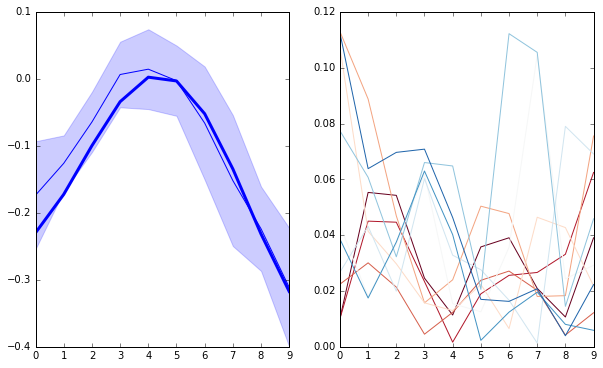

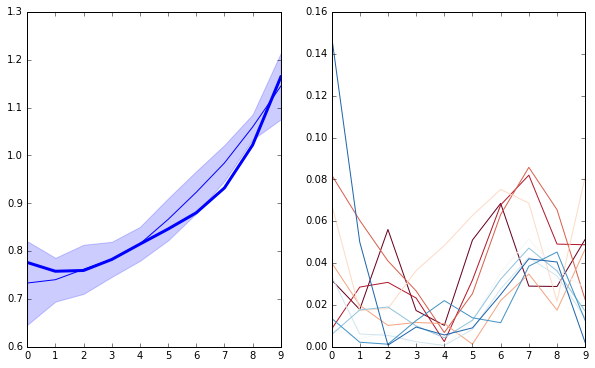

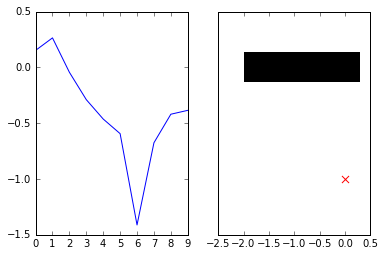

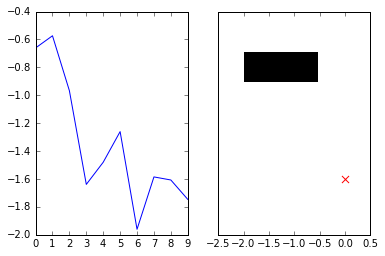

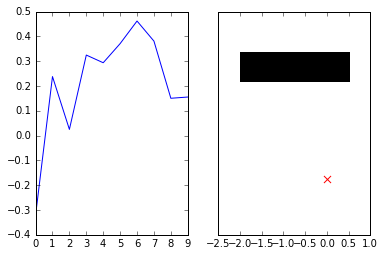

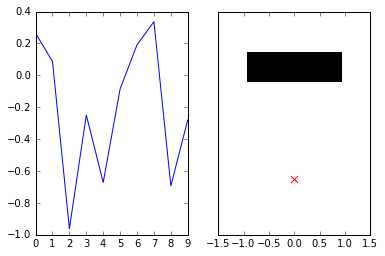

In [12]:
x,y,effect,samples,m,checks = testConvergence(2,2,10,10000,'test')
checks

In [41]:
reload(gpfanova.interval)

<module 'gpfanova.interval' from 'gpfanova/interval.py'>

In [46]:
ival = gpfanova.interval.FunctionInterval(m.functionSamples(0).values,.95)
ival.bounds

[(1e-06, 0.73),
 (2e-06, 0.73),
 (4e-06, 0.73),
 (8e-06, 0.73),
 (1.6e-05, 0.73),
 (3.2e-05, 0.73),
 (6.4e-05, 0.73),
 (0.000128, 0.73),
 (0.000256, 0.74),
 (0.000512, 0.74),
 (0.001024, 0.74),
 (0.002048, 0.74),
 (0.004096, 0.78),
 (0.008192, 0.85),
 (0.016384, 0.89),
 (0.032768, 0.94),
 (0.065536, 0.99),
 (0.049152, 0.98),
 (0.040959999999999996, 0.96),
 (0.036863999999999994, 0.96),
 (0.034816, 0.96),
 (0.033792, 0.95)]

In [47]:
ival.contains(samples[:,0])

True

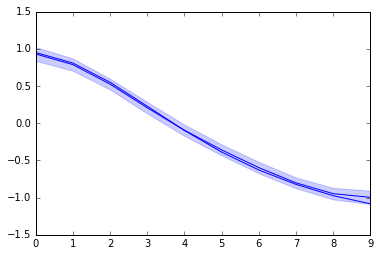

In [48]:
ival.plot()
plt.plot(samples[:,0])

In [9]:
x,y,effect,samples,m = setupSingleEffect(k=3,r=2,n=10,y_sigma=-2)

In [10]:
m.sample(100,thin=10)

In [20]:
fsamples = m.functionSamples(0).values[min(max(m.parameter_history.shape[0]-500,0),500):,:]

In [21]:
fsamples

array([[ 0.44991032,  0.56643201,  0.66143617,  0.72563287,  0.74758709,
         0.7154978 ,  0.62436624,  0.48269066,  0.31449629,  0.15143377],
       [ 0.48458825,  0.59606888,  0.6876045 ,  0.74652434,  0.7613948 ,
         0.72389259,  0.63157018,  0.48890981,  0.30798078,  0.10701732],
       [ 0.49705739,  0.60964124,  0.69264669,  0.73796606,  0.73993604,
         0.69727217,  0.61224722,  0.49103413,  0.34271013,  0.17858606],
       [ 0.48094031,  0.59426614,  0.6826891 ,  0.73766963,  0.75020616,
         0.71275726,  0.62299354,  0.48665089,  0.31921442,  0.14291599],
       [ 0.43244001,  0.55542901,  0.67593955,  0.76244106,  0.78610389,
         0.7359276 ,  0.62195708,  0.46805219,  0.30018052,  0.13950746],
       [ 0.53816017,  0.56586179,  0.63061148,  0.70011871,  0.73782437,
         0.71759448,  0.63434645,  0.50298076,  0.34595812,  0.17851928],
       [ 0.49193971,  0.58700362,  0.66997636,  0.7377676 ,  0.77140331,
         0.74615398,  0.65037032,  0.49843088

In [14]:
gpfanova.plot.plotFunctionSamples(fsamples)

IndexError: list index out of range

In [11]:
gpfanova.interval.functionInterval(m.functionSamples(0).values)

(5e-07, [(1e-06, 0.9)])

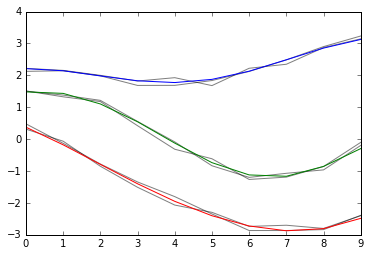

In [6]:
# this is what our sampled data and latent fxns look like

plt.plot(m.y,c='k',alpha=.5);
for i in range(m.mk[0]):
    plt.plot(samples[:,0]+np.dot(samples[:,1:],m.contrasts[0][i,:]));

In [7]:
# randomly permute our hyperparameters.
# this is after sampling our data for modeling, 
# so this serves to move our sampler away from 
# the true values at the beginning of MCMC.

m.parameter_cache['prior0_sigma'] = np.random.uniform(-1,1)
m.parameter_cache['prior0_lengthscale'] = np.random.uniform(-1,1)

m.parameter_cache['prior1_sigma'] = np.random.uniform(-1,1)
m.parameter_cache['prior1_lengthscale'] = np.random.uniform(-1,1)

In [8]:
m.parameter_cache['prior0_sigma'], m.parameter_cache['prior1_sigma']

(-0.75846799873022497, -0.19214893680869349)

In [9]:
m.parameter_cache['prior0_lengthscale'],m.parameter_cache['prior1_lengthscale']

(-0.024531958399828246, 0.53298019717876843)

In [10]:
m.sample(1)

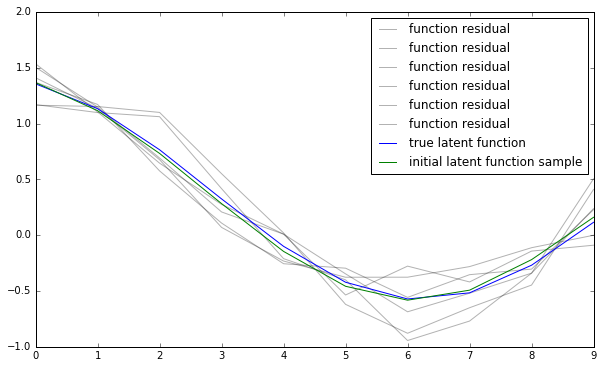

In [11]:
plt.figure(figsize=(10,6))
plt.plot(m.functionResidual(0).T,c='k',alpha=.3,label='function residual');
plt.plot(samples[:,0],label='true latent function');
plt.plot(m.functionMatrix()[:,0],label='initial latent function sample');

plt.legend(loc='best')

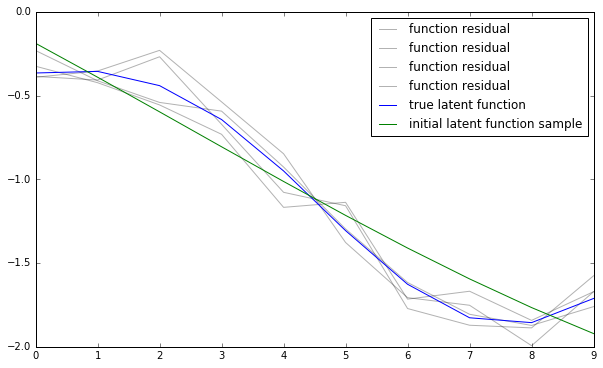

In [12]:
plt.figure(figsize=(10,6))
plt.plot(m.functionResidual(1).T,c='k',alpha=.3,label='function residual');
plt.plot(samples[:,1],label='true latent function');
plt.plot(m.functionMatrix()[:,1],label='initial latent function sample');

plt.legend(loc='best')

In [ ]:
for f in range(m.f):
    
    plt.figure(figsize=(10,6))
    plt.plot(m.functionResidual(f).T,c='k',alpha=.3,label='function residual');
    plt.plot(samples[:,f],label='true latent function');
    plt.plot(m.functionMatrix()[:,f],label='initial latent function sample');

    plt.legend(loc='best')

In [13]:
m.sample(10000,thin=10,verbose=True)

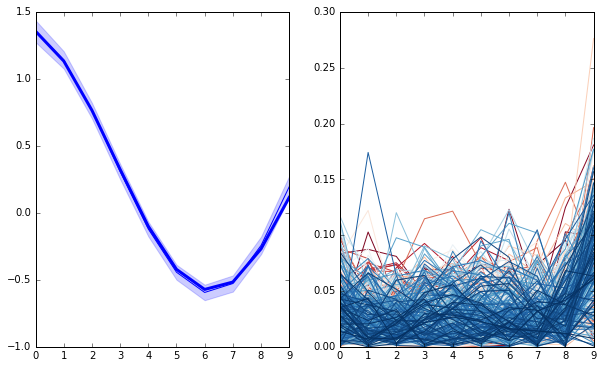

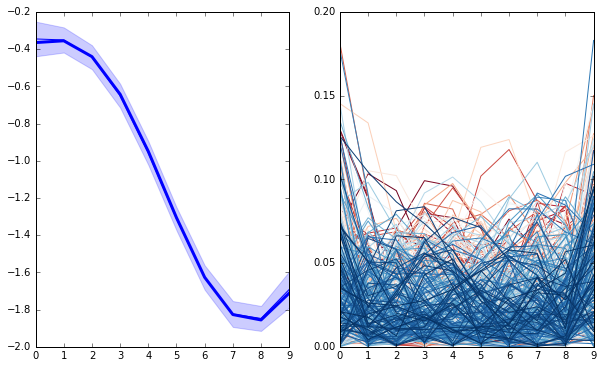

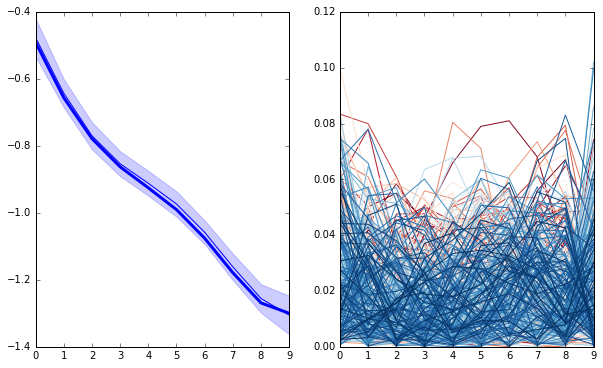

In [14]:
for f in range(m.f):
    
    fsamples = m.functionSamples(f).values[500:,:]
    
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    gpfanova.plot.plotFunctionSamples(fsamples)
    plt.plot(samples[:,f],lw=3);
    
    plt.subplot(122)
    diff = fsamples - samples[:,f]
    cmap = plt.get_cmap("RdBu")
    for i in range(diff.shape[0]):
        plt.plot(abs(diff[i,:]),c=cmap(1.*i/diff.shape[0]));

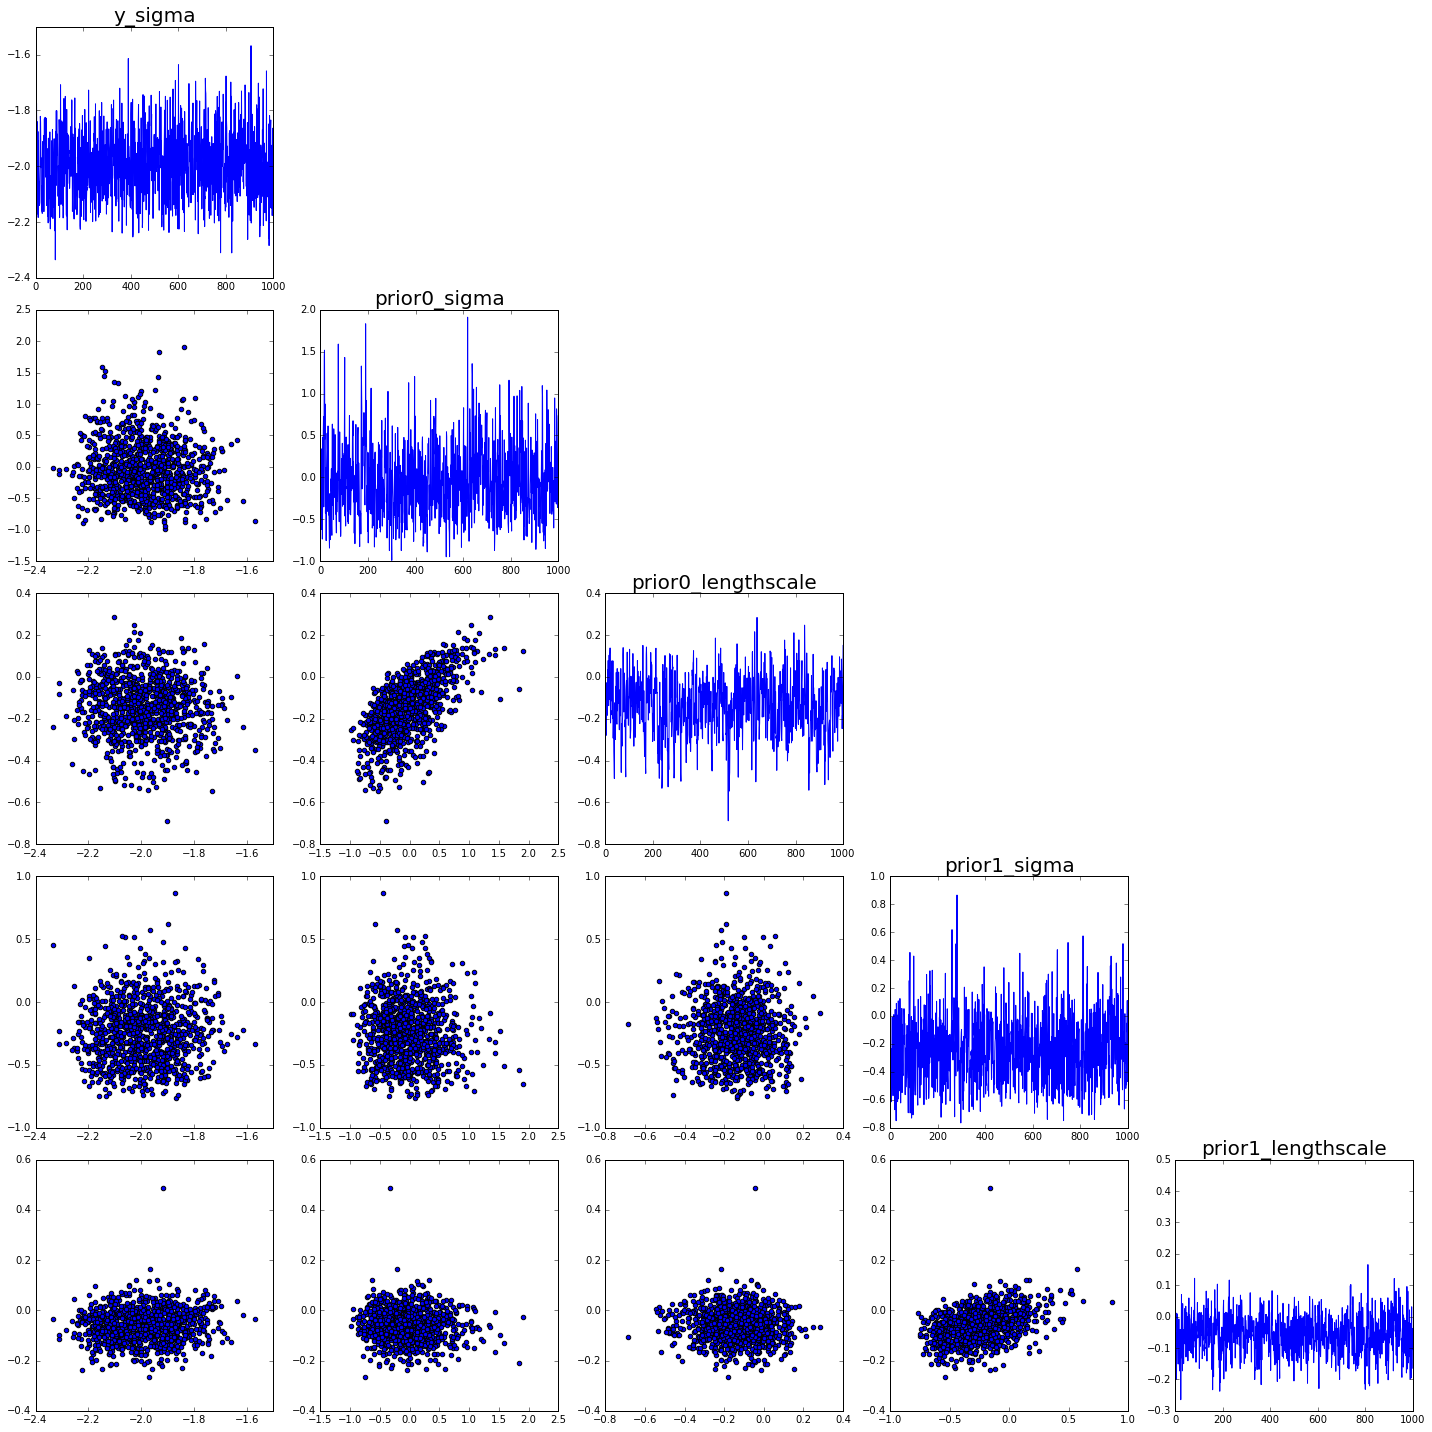

In [15]:
plt.figure(figsize=(20,20))
gpfanova.plot.plotHyperparameters(m,correlative=True)
plt.tight_layout()

In [16]:
from gpfanova import interval
reload(interval)

<module 'gpfanova.interval' from 'gpfanova/interval.pyc'>

In [40]:
ival = interval.ScalarInterval(m.parameterSamples('prior0_lengthscale').values[:,0],
                        .05,lambda x: m.prior_likelihood(0,lengthscale=x,prior_lb=-2,prior_ub=2))

ival.contains(0)

True

In [41]:
ival = interval.ScalarInterval(m.parameterSamples('prior0_sigma').values[:,0],
                        .05,lambda x: m.prior_likelihood(0,sigma=x,prior_lb=-2,prior_ub=2))

ival.contains(0)

True

In [44]:
ival = interval.ScalarInterval(m.parameterSamples('prior1_lengthscale').values[:,0],
                        .05,lambda x: m.prior_likelihood(1,lengthscale=x,prior_lb=-2,prior_ub=2))

ival.contains(0)

True

In [45]:
ival = interval.ScalarInterval(m.parameterSamples('prior1_sigma').values[:,0],
                        .05,lambda x: m.prior_likelihood(1,sigma=x,prior_lb=-2,prior_ub=2))

ival.contains(0)

True

(-0.0015, 0.0005)

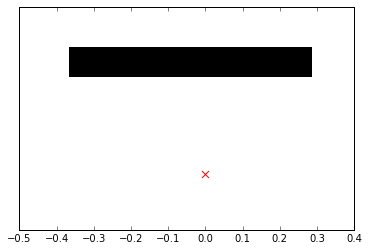

In [39]:
on = False
regs = []
for z in np.linspace(-2,2):
    if not on and ival.contains(z):
        on = True
        start = z
    elif on and not ival.contains(z):
        on = False
        regs.append((start,z))

for r in regs:
    plt.hlines(0,r[0],r[1],lw=30)
    
plt.scatter(0,-.001,c='r',marker='x',s=50)
plt.yticks([])
plt.ylim(-.0015,.0005)